In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.patches import Ellipse
%matplotlib inline
import math
import fitClus2D as fc
from scipy.stats import sigmaclip
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

import astropy
from astropy.stats import sigma_clip
from astropy.io import fits
from astropy.wcs import WCS

from PIL import Image

# These cuts get you a 4x4 arcmin square centered on the image center of the fields
img_cuts = {'a2744':[[519,4520],[412,4413]],
            'm0416':[[367,4368],[380,4381]]}
img_files = {'a2744':'Files/abell2744_RGB.fits',
             'm0416':'Files/macs0416_RGB.fits'}

import pandas as pd
from astropy.cosmology import LambdaCDM

In [74]:
zclus = {'a2744' : 0.308,
         'm0416' : 0.396}
pgals = {'a2744' : [1.689791e-01, 1.965115e+00, 2.0],
        'm0416' : [3.737113e-01, 1.322081e+00, 2.0]}

cluster = 'm0416'
catalog = "Files/" + cluster + "_master.csv"

dzcut=0.02; sigclip=3; sigcut=3; radialcut=120; maglim=23.5; colorcut=1.0
master = pd.read_csv(catalog)
zdat = master['master_z']
valid = master['master_valid']
memberindx = np.where((zdat>zclus[cluster]-dzcut)&(zdat<zclus[cluster]+dzcut)&(valid==1))[0]
z1 = zdat[memberindx]
print(len(z1))
z2 = sigma_clip(z1,sigma=sigclip)
print(len(z2))
print(np.mean(z2),np.std(z2))

dz = sigcut*np.std(z2)
print(dz)
ddat = master['master_d']
zdat = master['master_z']
mag814 = master['master_mag814']
mag606 = master['master_mag606']
valid = master['master_valid']
master_cut = master.iloc[np.where((ddat<radialcut)&(~np.isnan(mag606))&(~np.isnan(mag814))&(mag814<=maglim)&(valid == 1))]
print(len(master_cut))
zdat   = master_cut['master_z']
print(len(unknownindx))
print(unknownindx)
fgindx = np.where(zdat<zclus[cluster]-dz)[0]
bgindx = np.where(zdat>zclus[cluster]+dz)[0]
memindx = np.where((zdat>zclus[cluster]-dz)&(zdat<zclus[cluster]+dz))[0]

print(len(memindx))
clusterarr = [master_cut.iloc[i] for i in memindx]
clustnum = len(clusterarr)
print(len(fgindx))
print(len(bgindx))


980
980
0.39602520408163266 0.007215352640991353
0.02164605792297406
386
150
[236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385]
146
31
59


C:\Users\Jackson Lee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [62]:
# Read in RGB file 
RGB = fits.open(img_files[cluster])

# Put separate extensions into own R/G/B arrays
imr=Image.fromarray(RGB[1].data,mode=None) 
img=Image.fromarray(RGB[2].data,mode=None)
imb=Image.fromarray(RGB[3].data,mode=None)

# Merge them back into one image
merged=Image.merge("RGB",(imr,img,imb))

# Conversion factor to translate between x & y and pixels
# In units of arcseconds per pixel
conv = 23.8809/398.015 

# Cut image down to square shape & zoom in since it's a little big
xx = img_cuts[cluster][0] # sets area to cut to
yy = img_cuts[cluster][1]
val = 0 # sets zoom in

imgcut = np.array(merged)[xx[0]+val:xx[1]-val,yy[0]+val:yy[1]-val]

In [58]:
datapaper = pd.read_csv("Files/" + cluster + "paper.csv")
papercluster = []
for i, row in datapaper.iterrows():
    if row.Status == "member-spec":
        papercluster.append(row)
        

print(len(papercluster))
included = [False for i in range(clustnum)]
used = [False for i in range(len(papercluster))]


for i, gal in enumerate(papercluster):
    for j, gal2 in enumerate(clusterarr):
        if abs(gal.RA - gal2.master_RA) <= 0.000001 and abs(gal.Dec - gal2.master_Dec) <= 0.000001:
            included[j] = True
            used[i] = True

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
for i, gal in enumerate(clusterarr):
     if not included[i]:
         print(gal)

146
master_RA           64.041862
master_Dec         -24.076536
master_z               0.4239
balestra_lab              NaN
balestra_RA               NaN
balestra_Dec              NaN
balestra_z                NaN
balestra_magR             NaN
ebeling_lab               NaN
ebeling_RA                NaN
ebeling_Dec               NaN
ebeling_z                 NaN
glass2_lab             3220.0
glass2_RA           64.041814
glass2_Dec         -24.076573
glass2_mag160         22.4382
glass2_z               0.4239
adeep_lab              1214.0
adeep_RA            64.041862
adeep_Dec          -24.076536
adeep_quality             1.0
adeep_mag606          24.3595
adeep_err606           0.0171
adeep_mag814          23.4707
adeep_err814           0.0052
adeep_mag160          22.7566
adeep_err160           0.0033
adeep_z               0.38215
adeep_zerr              0.065
adeep_zflag               0.0
clash_lab              3184.0
clash_RA            64.041859
clash_Dec          -24.076533
clash_

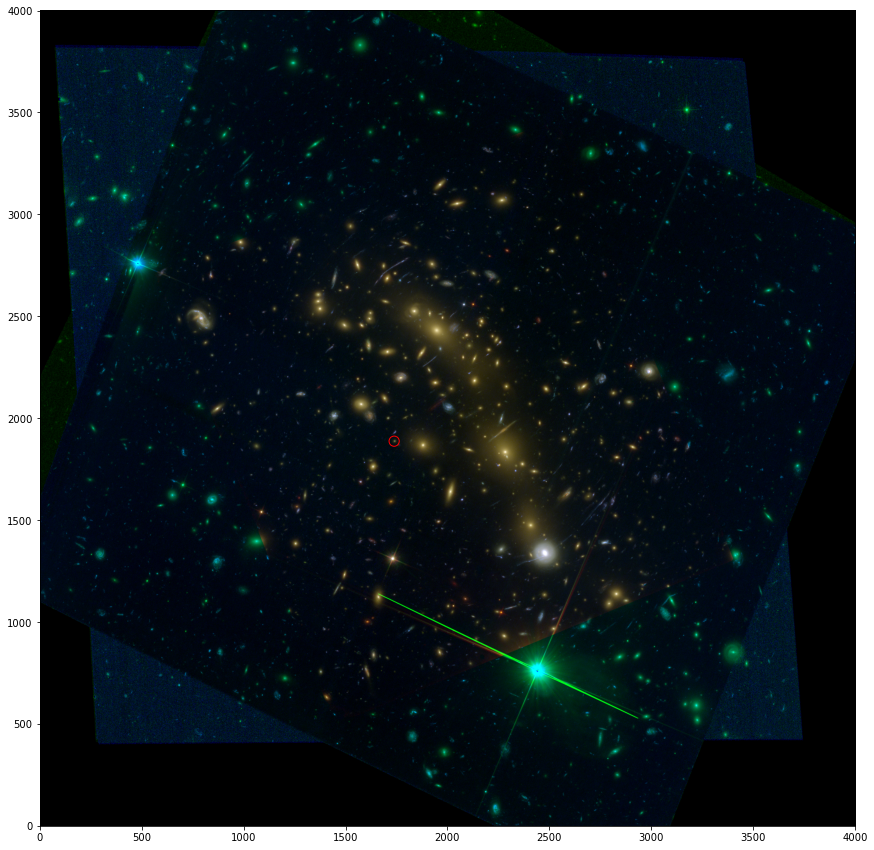

In [65]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.imshow(imgcut, origin='lower')

circle = plt.Circle((-15.706544/conv + (len(imgcut)/2), 
                                     -6.829867/conv + (len(imgcut)/2)), 
                                     25, edgecolor = "red", fill=False)
ax.add_artist(circle)